In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math

[[  7.12731332  -4.4394424 ]
 [  6.68873898  -2.44840134]
 [ -1.1004791   -7.78436803]
 [  3.99337867  -4.90451269]
 [ -1.8171622   -9.22909875]
 [ -2.05521901 -10.23141199]
 [  4.20397723  -3.61164749]
 [ -0.21804625  -9.21962706]
 [  5.19327641  -6.38845134]
 [ -1.83682056  -8.21952131]
 [  7.54287406  -5.35284052]
 [  4.88954545  -3.38947816]
 [ -1.76558632  -9.34943001]
 [  5.22597752  -5.5503347 ]
 [  6.64886376  -4.46203664]
 [  8.09408178  -4.8068287 ]
 [  6.32916529  -5.32177094]
 [  5.80670214  -5.14475233]
 [  5.67381136  -3.33963413]
 [  7.20870152  -6.04176429]
 [ -3.25014567  -8.67304842]
 [ -1.22856371  -7.96317275]
 [ -3.29446134  -7.45269997]
 [ -1.81294631  -7.55640734]
 [ -1.53809058  -8.77828137]
 [ -3.78288052  -9.38303174]
 [ -2.73473836  -9.34777956]
 [  0.56085542  -8.37942864]
 [ -0.74123127  -7.87270877]
 [ -1.78948268  -8.62182811]
 [  6.50753753  -3.62561777]
 [  4.60302933  -4.27563422]
 [ -1.26561532  -8.61262708]
 [ -0.72123914  -8.45607028]
 [  3.83024448

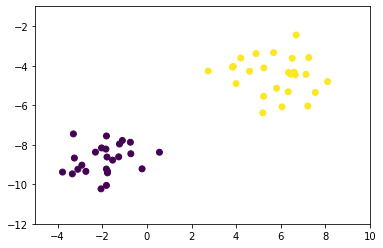

(50, 2)
(50,)


In [9]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)

#we need to add 1 to X values (we can say its bias)
print(X)
X1 = np.c_[np.ones((X.shape[0])),X]

print(X1)
print(y)

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

print(np.shape(X))
print(np.shape(y))

[[ 1.   0.1  0.5  3. ]
 [ 1.   1.  -1.   0. ]
 [ 1.   0.   1.   0. ]
 [ 1.   0.1  0.5  1. ]]
[ 1  1 -1  1]
(4, 3)
(4,)


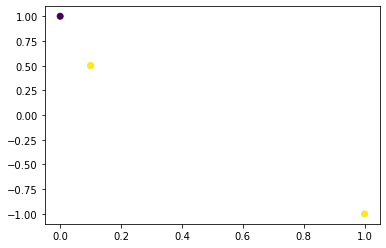

In [10]:
x = [
    [0.1, 0.5, 3.0],
    [1.0, -1.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.1, 0.5, 1.0]
]

y = [1, 1, -1, 1]

y = np.asarray(y)
X = np.asarray(x)

#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]

print(X1)
print(y)


print(np.shape(X))
print(np.shape(y))

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.show()

In [4]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==0:
        print(X[i])
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)}

In [5]:
#all the required variables 
w=[] #weights 2 dimensional vector
b=[] #bias

max_feature_value=float('-inf')
min_feature_value=float('+inf')
        
for yi in data_dict:
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
def SVM_Training(data_dict):
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5

    for lrate in learning_rate:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation
                    
                    correctly_classified = True
                    
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2

In [ ]:
SVM_Training(data_dict)

In [ ]:
colors = {1:'r',-1:'b'}
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [ ]:
def visualize(data_dict):
       
        
        #[[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict]
        
        plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (min_feature_value*0.9,max_feature_value*1.)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        plt.axis([-5,10,-12,-1])
        plt.show()

In [ ]:
visualize(data_dict)

In [ ]:
def predict(features):
        # sign( x.w+b )
        dot_result = np.sign(np.dot(np.array(features),w)+b)
        return dot_result.astype(int)
    
for i in X[:5]:
    print(predict(i),end=',  ')

In [ ]:
l=[]
for xi in X:
    
    l.append(predict(xi[:6]))
l=np.array(l).astype(int)
l

In [ ]:
X[4]

In [ ]:
for i, v in enumerate(y):
    if v==0:
        y[i]=-1
y

In [ ]:
error = sum((l-y)**2)

In [ ]:
error